In [191]:
! pip install spacy
! pip install wordcloud

In [193]:
# STEP 1.Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from spacy import displacy
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import string
import re

In [195]:
# STEP 2.Load the datset
df = pd.read_csv(r"C:\datasets\review dataset.csv")
df.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [197]:
df.isna().sum()

review    0
rating    0
dtype: int64

In [199]:
df.shape

(9976, 2)

In [201]:
df = df.dropna()

In [203]:
df.isna().sum()

review    0
rating    0
dtype: int64

In [205]:
df.rating.value_counts()

rating
5    5726
4    2365
3     884
1     691
2     310
Name: count, dtype: int64

In [207]:
# STEP 3.load spacy model
nlp = spacy.load("en_core_web_sm")

In [ ]:
# STEP 4.Text Preprocessing

In [209]:
# Perform Lemmatization
def lemmatization(text):
    doc = nlp(text)
    lemmalist = [word.lemma_ for word in doc]
    return ' '.join(lemmalist)

In [211]:
# Apply lemmatization on review column
df['lemma'] = df['review'].apply(lemmatization)

In [212]:
df.head()

,review,rating,lemma
0,It was nice produt. I like it's design a lot. ...,5,it be nice produt . I like it be design a lot ...
1,awesome sound....very pretty to see this nd th...,5,awesome sound .... very pretty to see this nd ...
2,awesome sound quality. pros 7-8 hrs of battery...,4,awesome sound quality . pro 7 - 8 hrs of batte...
3,I think it is such a good product not only as ...,5,I think it be such a good product not only as ...
4,awesome bass sound quality very good bettary l...,5,awesome bass sound quality very good bettary l...


In [215]:
# Remove all stop words from review 
def remove_stopwords(text):
    doc = nlp(text)
    no_stopwords = [word.text for word in doc if not word.is_stop and not word.is_punct]
    return ' '.join(no_stopwords)
df["Final"] = df["lemma"].apply(remove_stopwords)

In [216]:
df.head()

,review,rating,lemma,Final
0,It was nice produt. I like it's design a lot. ...,5,it be nice produt . I like it be design a lot ...,nice produt like design lot easy carry ...
1,awesome sound....very pretty to see this nd th...,5,awesome sound .... very pretty to see this nd ...,awesome sound pretty nd sound quality good wis...
2,awesome sound quality. pros 7-8 hrs of battery...,4,awesome sound quality . pro 7 - 8 hrs of batte...,awesome sound quality pro 7 8 hrs battery life...
3,I think it is such a good product not only as ...,5,I think it be such a good product not only as ...,think good product quality design good m use p...
4,awesome bass sound quality very good bettary l...,5,awesome bass sound quality very good bettary l...,awesome bass sound quality good bettary long l...


In [219]:
df.drop(columns = ["review", "lemma"], inplace = True)

In [221]:
df.head()

,rating,Final
0,5,nice produt like design lot easy carry ...
1,5,awesome sound pretty nd sound quality good wis...
2,4,awesome sound quality pro 7 8 hrs battery life...
3,5,think good product quality design good m use p...
4,5,awesome bass sound quality good bettary long l...


In [223]:
df.isna().sum()

rating    0
Final     0
dtype: int64

In [225]:
# Dividing the dataset
X = df.drop(columns = ['rating'])
y = df["rating"]

In [257]:
print(X.shape, y.shape) 

(6000, 6426) (9976,)


In [227]:
# Convert text into numerical features using TF-IDF
tfidf = TfidfVectorizer()

In [229]:
tfidf.fit(X["Final"])

TfidfVectorizer()

In [231]:
tfidf_matrix = tfidf.transform(X["Final"]).toarray()
tfidf_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [233]:
vectorizer_df = pd.DataFrame(tfidf_matrix, columns = tfidf.get_feature_names_out())

In [235]:
vectorizer_df.head()

,00,000,000000000,00pm,02,06,06feb2018boat,08,10,100,...,𝑔𝑜𝑜𝑑read,𝑖𝑠,𝑙𝑖𝑡𝑡𝑙𝑒,𝑜𝑓,𝑜𝑡ℎ𝑒𝑟𝑠,𝑝𝑟𝑒𝑠𝑠𝑢𝑟𝑒,𝑝𝑟𝑜𝑑𝑢𝑐𝑡,𝑠𝑖𝑑𝑒,𝓝𝓲𝓬𝓮read,𝗡𝗶𝗰𝗲read
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [237]:
X.drop(columns =["Final"], inplace = True)

In [239]:
X.shape, vectorizer_df.shape

((9976, 0), (9976, 6426))

In [241]:
X = pd.concat([X, vectorizer_df], axis = 1)

In [243]:
X.head()

,00,000,000000000,00pm,02,06,06feb2018boat,08,10,100,...,𝑔𝑜𝑜𝑑read,𝑖𝑠,𝑙𝑖𝑡𝑡𝑙𝑒,𝑜𝑓,𝑜𝑡ℎ𝑒𝑟𝑠,𝑝𝑟𝑒𝑠𝑠𝑢𝑟𝑒,𝑝𝑟𝑜𝑑𝑢𝑐𝑡,𝑠𝑖𝑑𝑒,𝓝𝓲𝓬𝓮read,𝗡𝗶𝗰𝗲read
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [245]:
X.isna().sum()

00           0
000          0
000000000    0
00pm         0
02           0
            ..
𝑝𝑟𝑒𝑠𝑠𝑢𝑟𝑒     0
𝑝𝑟𝑜𝑑𝑢𝑐𝑡      0
𝑠𝑖𝑑𝑒         0
𝓝𝓲𝓬𝓮read     0
𝗡𝗶𝗰𝗲read     0
Length: 6426, dtype: int64

In [277]:
X = X.iloc[:6000]

In [279]:
print(X.shape)
print(y.shape)

(3000, 6426)
(9976,)


In [283]:
print(X.index.equals(y.index))

False


In [285]:
X, y = X.align(y, join='inner', axis=0)

In [287]:
# STEP 6.Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [291]:
X_train.shape, y_train.shape

((2400, 6426), (2400,))

In [293]:
# STEP 7.Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [295]:
# STEP 8.Make predictionson the test set
y_pred = model.predict(X_test)
y_test[:5]

1801    4
1190    5
1817    5
251     4
2505    4
Name: rating, dtype: int64

In [297]:
y_pred[:5]

array([5, 5, 5, 5, 5], dtype=int64)

In [299]:
# STEP 9.Evaluate the model
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.64

Classification Report:
               precision    recall  f1-score   support

           1       0.85      0.45      0.59        38
           2       0.00      0.00      0.00        18
           3       0.25      0.05      0.08        41
           4       0.49      0.26      0.34       157
           5       0.66      0.94      0.78       346

    accuracy                           0.64       600
   macro avg       0.45      0.34      0.36       600
weighted avg       0.58      0.64      0.58       600



C:\Users\priya\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\priya\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\priya\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Text(0.5, 1.0, 'CONFUSION MATRIX FOR SENTIMENT ANALYSIS')

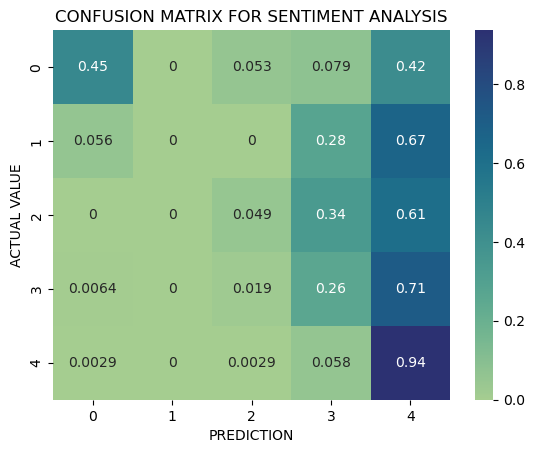

In [301]:
cf = confusion_matrix(y_test, y_pred, normalize = 'true')
sns.heatmap(cf, annot = True, cmap = 'crest');
plt.xlabel("PREDICTION");
plt.ylabel("ACTUAL VALUE");
plt.title("CONFUSION MATRIX FOR SENTIMENT ANALYSIS")